# Data Lesson Map

<font color=red>Red </font> highlighted is the topic covered for this lesson

1. <font color=red>Basics Data Science and Visualisation</font>
>* <font color=red>Obtaining Data</font>
>* Basic Data Processing
>* Basic statistics
>* <font color=red>Data visualization</font>
>* Handling erroneous and missing data
2. <font color=red>Data Machine Learning Techniques</font>
>* <font color=red>Supervised Learning Techniques</font>
>* Supervised Regression
>* Artificial Neural Networks
3. <font color=red>AI for Data Walkthrough </font>
>* <font color=red>Model Output </font>
>* Outputs Visualisation and Validation
4. <font color=red>AI Models </font>
>* Linear Regression
>* <font color=red>Underfitting vs Overfitting</font>
>* <font color=red>K-Nearest Neighbour (KNN)</font>
>* <font color=red>Decision Tree</font>
>* Convolutional Neural Networks (CNN)

# Model Outputs

Previously, you have learnt how to train a model and how to use it for predictions. While that is essential in any data science project, it is not sufficient to just train a model and using it for predictions. This is because even though the model has been trained, we did not evaluate its performance. 

The model has to be evaluated against data that was not used to train the model. This is because while the model may perform very well with data that it has trained with, it may not be useful if the model is not able to be used for data that it was not trained with. Thus, in this notebook, we will also learn how to ensure that this does not happen. Before we do so, we have to first understand why a model can perform poorly to unseen data even after training. This could be due to either underfitting or overfitting.

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn import tree

## 1. Underfitting vs Overfitting

Underfitting means that the model is too simplified to be able to explain the data. For example, if you have data that has a non-linear relationship but you are using a linear model to train on, you may suffer from underfitting. This is because the linear model will not be able to explain the non-linear relationship or trend that is observed in the data. Thus, when you use an underfitted model to predict, it will perform poorly.

On the other hand, overfitting means that the model is fitted so well that it has also learnt all the noise or outliers within the dataset. As such, it can perform very well when you test it against data that it has been trained with. However, because it is so well trained, it will not be able to generalise and thus, will not perform well when you are testing it against data that it was not trained with.

Read this [article](https://medium.com/greyatom/what-is-underfitting-and-overfitting-in-machine-learning-and-how-to-deal-with-it-6803a989c76) and this [article](https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229) for more information about underfitting and overfitting and note down any interesting information in the cell below. While there may be some mathematical equations within the articles, it is ok if you are not able to understand the equations. It is more important to understand the underlying concepts. What is the difference between bias and variance? How do you prevent underfitting? How do you prevent overfitting?

<font color=red>Your answer:</font> 

In [ ]:
# Bias -> Bias is the difference between the average prediction of our model and the correct value which we are trying to predict.
# variance -> Variance is the variability of model prediction for a given data point or a value which tells us spread of our data.

Look at the figures below. If the red line were to be your model and the blue points are the dataset, would the model be overfitting or underfitting?

![Underfitting](https://miro.medium.com/max/2688/1*khzX1tmUj86vfpzE6Gkf0A.png)

Please refer to 
"/content/Intel_AI4Y/My Drive/Intel_AI4Y_Colab/Module_18/resources/model1.jpg"

<font color=red>Your answer:</font> 

In [ ]:
# overfitting 

![Overfitting](https://upload.wikimedia.org/wikipedia/commons/thumb/6/68/Overfitted_Data.png/300px-Overfitted_Data.png)

Please refer to 
"/content/Intel_AI4Y/My Drive/Intel_AI4Y_Colab/Module_18/resources/model2.jpg"

<font color=red>Your answer:</font> 

In [ ]:
# underfitting 

## 2. Balance between underfitting and overfitting

We can see from above that it is important to try and find a balance between underfitting and overfitting. This will allow the model to be accurate but still be able to generalise or perform well on data that it has not been trained in. This means that the model has to be somewhat complex but not too complex. As such, there are some ways that we can try to achieve the balance. We will try some of these methods for the different machine learning techniques that were explored earlier.

## 2.1 K-Nearest Neighbour

In an earlier workshop, we learnt how to apply the K-Nearest Neighbour (KNN) algorithm to classify data. As a recap, KNN classifies data points based on the majority of the other points that are closest to the point in question. However, in order to use the algorithm, there was a need to input the number of neighbours as a parameter. In the case of underfitting and overfitting, the number of neighbours do play an important role. This is because the number of neighbours determine how likely the model will overfit. The higher the number of neighbours, the less likely the model will overfit. If the number of neighbours is too high, it will be likely for the model to underfit. Thus, there should be some number in between the two extreme numbers that will allow the model to be relatively balanced. This number will differ for different datasets. We will now try to find this number for the Iris Flower dataset.

First, we will need to read in the Iris Flower dataset as a dataframe df from iris.data. Remember to check if the dataframe has column names and also perform the standard checks for the dataset (i.e check for erroneous data and outliers). You can refer to the picture (source: https://www.researchgate.net/figure/Trollius-ranunculoide-flower-with-measured-traits_fig6_272514310) below to understand the variables.

![alt text](https://www.researchgate.net/profile/Zhi-Gang_Zhao2/publication/272514310/figure/fig6/AS:340442961989646@1458179335869/Trollius-ranunculoide-flower-with-measured-traits.png)

Please refer to 
"/content/Intel_AI4Y/My Drive/Intel_AI4Y_Colab/Module_18/resources/PetalSepal1.png"

In [2]:
from google.colab import drive
drive.mount('/content/Intel_AI4Y')

Mounted at /content/Intel_AI4Y


<font color=red>Hints:</font> 

*   Refer to Module 17 Assignment 1 "Supervised_learning_techniques"in the beginning or Module 17 Assignment 3 "2. Obtain and explore dataset"
*   Remember to print head and describe

In [58]:
df = pd.read_csv('/content/Intel_AI4Y/My Drive/Intel_AI4Y/Students_E_Learning/Copy_To_Google_Drive/Intel_AI4Y_Colab/Module_18/data/iris.data')
names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']

df.columns = names
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  149 non-null    float64
 1   sepal width   149 non-null    float64
 2   petal length  149 non-null    float64
 3   petal width   149 non-null    float64
 4   class         149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [59]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [60]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


Now, perform the necessary steps that are required to prepare the data to be processed by a machine learning algroithm. First, extract the features as `x_values` and the target variable as `y_values`. In this case, the `x_values` will be "`sepal_length`", "`sepal_width`", "`petal_length`" and "`petal_width`" whereas the . Additionally, remmeber to label encode the y_values. You can encode "`Setosa`" as `0`, "`Versicolor`" as `1` and "`Virginica`" as `2`. Refer to earlier notebooks if you require a reference for the necessary codes.


<font color=red>Hints:</font> 
*   refer to Module 17 assignment 1 "Supervised_learning_techniques" at "Setting up data for the KNN algorithm" section
*   `x_values` => dataframe "`sepal_length`", "`sepal_width`", "`petal_length`" and "`petal_width`"
*   `y_values` => dataframe "class"

In [61]:
# encode y_values into numerical data
label_encode_setosa = {"class": {"Iris-setosa":0}}
label_encode_versicolor = {"class": {"Iris-versicolor":1}}
label_encode_virginica = {"class": {"Iris-virginica":2}}

df.replace(label_encode_setosa,inplace=True)
df.replace(label_encode_versicolor,inplace=True)
df.replace(label_encode_virginica,inplace=True)
print(df['class'].value_counts())


2    50
1    50
0    49
Name: class, dtype: int64


In [62]:
pd.get_dummies(df['class'])

,0,1,2
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
144,0,0,1
145,0,0,1
146,0,0,1
147,0,0,1


In [77]:
x_values = df[['sepal length', 'sepal width', 'petal length', 'petal width']]
y_values = df['class']

print(x_values.head())
print(y_values.head())

   sepal length  sepal width  petal length  petal width
0           4.9          3.0           1.4          0.2
1           4.7          3.2           1.3          0.2
2           4.6          3.1           1.5          0.2
3           5.0          3.6           1.4          0.2
4           5.4          3.9           1.7          0.4
0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64


After we are assurred that the data is ready to be processed by a machine learning technique, we can now focus on how to balance the overfitting and underfitting issue.

If we want to determine this balance, we will need to be able to evaluate how well the model will perform or how accuracte the model will be if the model were to be applied to data that it has not been trained with. As we do not have future data, we will need to be able to use the current data to perform this evaluation. As such, the current dataset is usually split into 2 different groups. One group will contain all the training data which will be used to train the data. On the other hand, the other group will contain test data that will not be seen or used in the model training phase. The test data will serve as "future" data which will be used to evaluate the model.

In order to split the data into 2 groups, we will use the `train_test_split` function from `sklearn.model_selection`. Try the code below to import the `train_test_split` function.

In [78]:
from sklearn.model_selection import train_test_split

Use the `train_test_split` function to split the data into the train group and the test group. The test group usually will contain 20% to 30% of the dataset. In this case, we can split the data based on 75% in the train group and 25% in the test group. Read this [article](https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) to understand how to use the `train_test_split` function. You can create variables called `x_train`, `y_train`, `x_test` and `y_test` to hold the training and testing data. Additionally, you can also add a random_state to ensure that the data is always split the same way everytime you run the code.

<font color=red>Hints:</font> 
*   Refer to Moudle 17 assignment 2 "Supervised_Regression"
*   `test_size = 0.25`
*   `random_state=10`
*   Please review: https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6





In [79]:
x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.25, random_state=10)

After splitting the data, we now have to standardise or normalise the data. It is always good practice to standardise or normalise any dataset that you use for machine learning. This will help scale the values for all the variables or features into similar ranges. Always remember to conduct the standardisation or normalisation after the data has been split. This is to ensure that the test dataset will always remain unseen by the model and not used in the normalisation or standardisation process of the training data.

In this case, we will choose to use StandardScaler from `sklearn.preprocessing` to standardise the data. Remember to apply the `.fit_transform` method to the `x_train` data values but only the .transform method to the `x_test` data. Implement the standardisation process in the cell below. Create a variable called `x_train_scale` for the train data after standardisation and create another variable called `x_test` scale for the test data after standardisation.

<font color=red>Hint:</font>  refer to Module 17 Assignment 3 "Artificial_neural_networks"  look for `StandardScaler()`, `standardise.fit_transform()` and `standardise.transform()`

In [86]:
# Proceed with standardisation
print("Number of rows in x_train:", x_train.shape[0])
print("Number of rows in x_test:", x_test.shape[0])
print("Number of rows in y_train:", y_train.shape[0])
print("Number of rows in y_test:", y_test.shape[0])

standardise = StandardScaler()

x_train_scale = standardise.fit_transform(x_train)
x_test_scale = standardise.transform(x_test)




Number of rows in x_train: 111
Number of rows in x_test: 38
Number of rows in y_train: 111
Number of rows in y_test: 38


After standardising the data, we can now implement a way to find the optimal number of neighbours for the KNN algorithm. To do so, we will train the KNN algorithm with differnt number of neighbours and also evaluate against the test data. By doing so, we will be able to obtain the accuracy of the KNN model for different number of neighbours. We can then find the number of neighbours that correspond to the highest accuracy. That number will be the optimal number of neighbours. Try the code below!

In [87]:
# Create an empty list to store the accuracy and number of neighbours for each KNN model
accuracy = []
num_neigh = []

# Use ii to cycle through values 1 to 15. This will be the number of neighbours for the KNN classifier. 
for ii in range(1,16):
    # Set number of neighbours to ii
    KNN = KNeighborsClassifier(n_neighbors=ii)
    # Training or fitting the model with the data
    KNN.fit(x_train_scale,y_train)
    # .score provides the accuracy of the model based on the testing data. Store the accuracy into the list.
    accuracy.append(KNN.score(x_test_scale,y_test))
    # Append the number of neighbours to a list
    num_neigh.append(ii)

print(accuracy)

[0.9210526315789473, 0.8947368421052632, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9210526315789473, 0.9210526315789473, 0.9473684210526315, 0.8947368421052632, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473]


Let us plot the accuracy values on the graph to help us determine the optimal number of neighbours. Try the code below! Remember to `import matplotlib.pyplot as plt`.

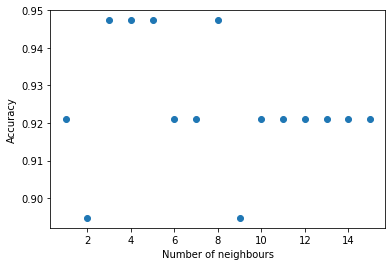

In [88]:
plt.scatter(num_neigh,accuracy)
plt.xlabel('Number of neighbours')
plt.ylabel('Accuracy')
plt.show();

From the graph above, which will be the optimal number of neighbours to use? Explain your answer.

<font color=red>Your answer:</font> 

In [ ]:
# 3, because it is a odd number and it has a high acc. It also requires the least amount of time to complete.

## 2.2 Decision Tree

It is also possible for a decision tree to underfit or overfit.

For example, if the tree only has 1 decision point then it is likely for the tree to underfit. However, if the tree has multiple decision points, then it is possible for the tree to overfit. As such, the deeper the tree, the more likely it is for the tree to overfit. Based on your understanding of overfitting and underfitting, decide which trees (shown below) will be likely to overfit or underfit the data.

![Overfit](https://jotterbach.github.io/static/d2dc5f7eb2d525500c8e06241769651e/34ea8/decision_tree_overfit_branching.png)

Please refer to 
"/content/Intel_AI4Y/My Drive/Intel_AI4Y_Colab/Module_18/resources/dt1.jpg"

<font color=red>Your answer:</font> 

In [ ]:
# blue will underfit
# orange will overfit(noisy)

![Underfit](https://miro.medium.com/max/6810/1*1tGLoeGg4cDwQXSLSgD5Zg.png)

Please refer to 
"/content/Intel_AI4Y/My Drive/Intel_AI4Y_Colab/Module_18/resources/dt2.jpg"

<font color=red>Your answer:</font> 

In [ ]:
#your answer here

Additionally, another way to control for overfitting or underfitting is based on the minimum number of samples that are at a decision point before a split is conducted. For example, if we have a decision point in the tree that is based on weather and there are 50 different points either consisting of sunny days or rainy days, it will be obvious that we should split the data at that decision point as there are quite a few samples or data points. However, if we only have 2 data points at that weather decision point, then it may not be necessary to split them based on weather as it may lead to overfitting. Thus, we can also use the number of samples at a decision point to control the fit.

You can read this [article](https://medium.com/@mohtedibf/indepth-parameter-tuning-for-decision-tree-6753118a03c3) to understand more on how to control for overfitting and underfitting in a decision tree. What are the other variables that we can use to control the fit in a decision tree?


<font color=red>Your answer:</font> 

In [ ]:
'''criterion{“gini”, “entropy”}, default=”gini”
The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.'''

'''splitter{“best”, “random”}, default=”best”
The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.'''

'''min_samples_splitint or float, default=2
The minimum number of samples required to split an internal node:'''

Let us try to find the best set of parameters to allow the decision tree to have a good fit on the Iris Flower dataset. We can use the same splitted datasets from the earlier exercise above. Try the code below! The variable that we are using to control the fit in the tree is known as max_depth. This refers to the maximum depth of the tree. The deeper the tree, the more likely it is for the tree to overfit. Remember to import tree from sklearn.

In [89]:
# Create an empty list to store the accuracy and the best tested parameter for each decision tree
accuracy = []
depth = []

# Use ii to cycle through values 1 to 9. This will be the max_depth value for the decision tree. 
for ii in range(1,10):
    # Set max_depth to ii
    dt = tree.DecisionTreeClassifier(max_depth=ii)
    # Training or fitting the model with the data
    dt.fit(x_train_scale,y_train)
    # .score provides the accuracy of the model based on the testing data. Store the accuracy into the list.
    accuracy.append(dt.score(x_test_scale,y_test))
    # Append the max_depth values to a list
    depth.append(ii)

print(accuracy)

[0.5526315789473685, 0.9473684210526315, 0.9473684210526315, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473]


Can you plot the accuracy values against the `max_depth` values in a graph? You can refer to the earlier graph for referrence.

<font color=red>Hints:</font> 
*   Refer to Module 13 Assignment 2 "Data Visualization" or Module 16 Assignment 2 "Basic_data_processing_and_visualisation" on Scatter plot
*   `x` => `Max_Depth`
*   `y` => `Accuracy`

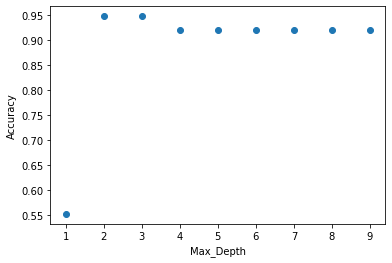

In [90]:
plt.scatter(depth,accuracy)
plt.xlabel('Max_Depth')
plt.ylabel('Accuracy')
plt.show();

From the graph, which will be the recommended `max_depth` value?

<font color=red>Your answer:</font> 

In [ ]:
# 2

If you recall, the minimum number of samples at a decision point can also be used to prevent overfitting or underfitting. In the decision tree algorithm, this value is controlled by `min_samples_split`. Copy the code above and modify it to find the best `min_samples_split` value. You can use the range between `2` and `15`. Plot the accuracy values for easy visualisation as well.

<font color=red>Hint:</font>  similar to above 2 sections of code but use `min_samples_split`

In [97]:
# Create an empty list to store the accuracy and the best tested parameter for each decision tree
accuracy = []
depth = []

# Use ii to cycle through values 1 to 9. This will be the max_depth value for the decision tree. 
for ii in range(1,10):
    # Set max_depth to ii
    dt = tree.DecisionTreeClassifier(min_samples_split=2)
    # Training or fitting the model with the data
    dt.fit(x_train_scale,y_train)
    # .score provides the accuracy of the model based on the testing data. Store the accuracy into the list.
    accuracy.append(dt.score(x_test_scale,y_test))
    # Append the max_depth values to a list
    depth.append(ii)

print(accuracy)

[0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473]


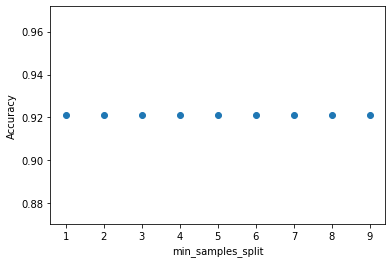

In [98]:
plt.scatter(depth,accuracy)
plt.xlabel('min_samples_split')
plt.ylabel('Accuracy')
plt.show();

From your graph, which will be the best `min_samples_split` value? Would you choose the lowest value with the highest accuracy?


<font color=red>Your answer:</font> 

In [ ]:
# 1. 5, becuase min_samples_split is used to control over-fitting. Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree. 
#Too high values can also lead to under-fitting hence depending on the level of underfitting or overfitting